IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import missingno as  msno
from plotly.subplots import make_subplots

LOAD DATA

In [2]:
df = pd.read_csv("reported_numbers.csv")

In [3]:
df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


REPLACE NAN

In [4]:
df['No. of deaths'] = df['No. of deaths'].replace(np.nan, 0)
df['No. of cases'] = df['No. of cases'].replace(np.nan, 0)
df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,0.0,Europe


EXPLORATORY DATA ANALYSIS
1) TOP 50 COUNTRIES WITH LARGEST NUMBER OF CASES IN 2016

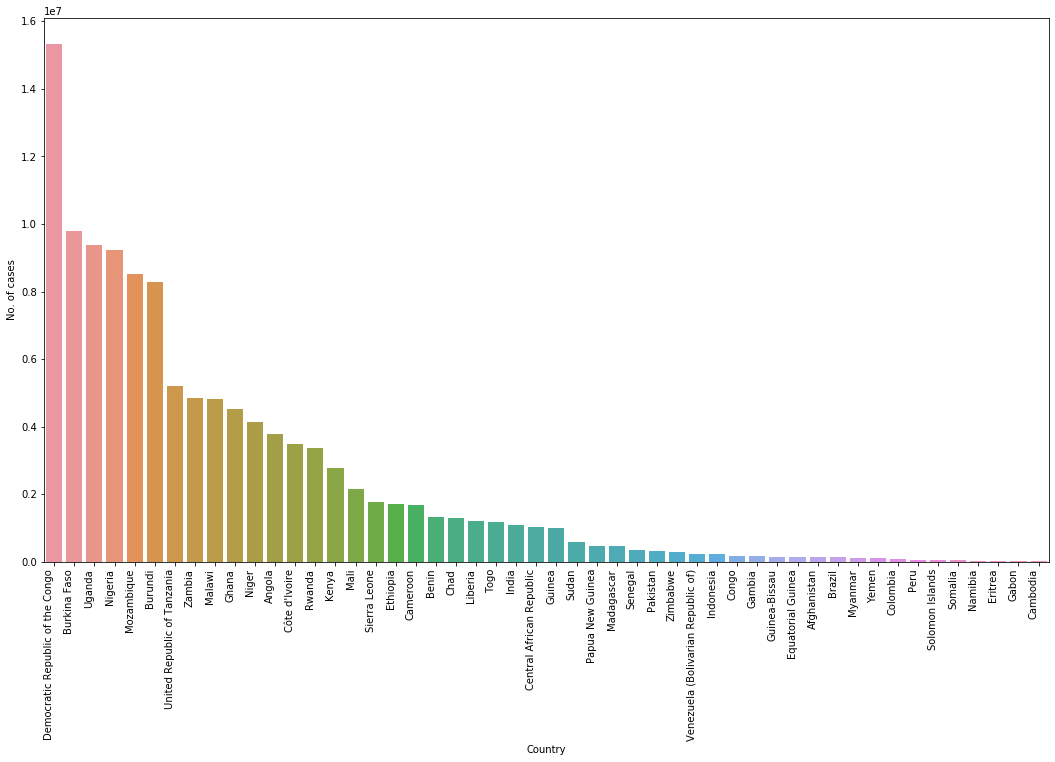

In [9]:
df1 = df.sort_values(by = 'No. of cases', ascending=False)
df1 = df1[df1['Year']==2016][:50]
plt.figure(figsize=(18,10))
sns.barplot(df1['Country'], df1['No. of cases'])
plt.xticks(rotation=90, ha='right');

2) TOP 50 COUNTRIES WITH LARGEST NUMBER OF CASES IN 2017

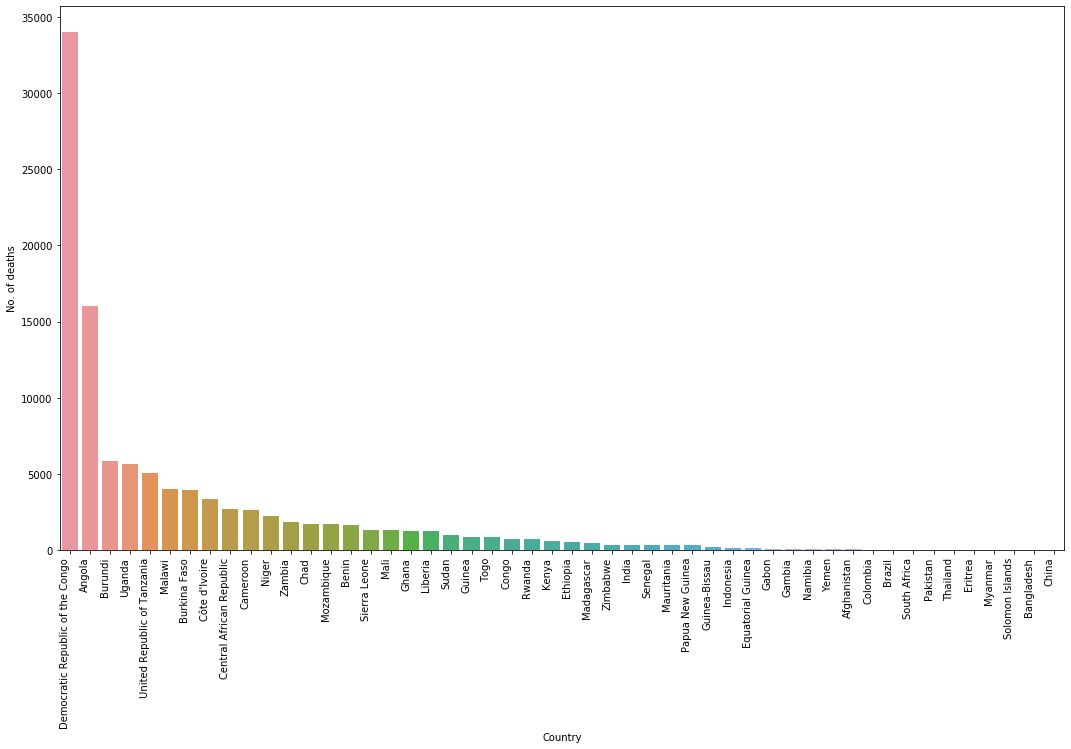

In [8]:
df2 = df.sort_values(by = 'No. of deaths', ascending=False)
df2 = df2[df2['Year']==2016][:50]
plt.figure(figsize=(18,10))
sns.barplot(df2['Country'], df2['No. of deaths'])
plt.xticks(rotation=90, ha='right');

3) MALARIA DEATH AND CASES OVER THE YEARS

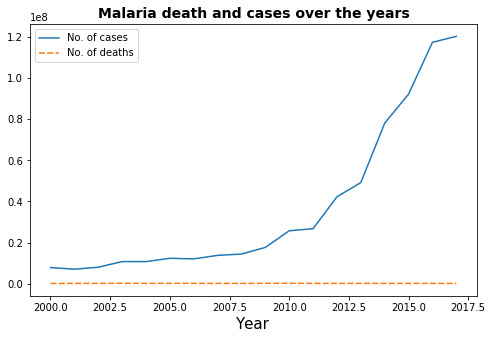

In [18]:
df4 = df.groupby('Year').sum().loc[:, ['No. of cases', 'No. of deaths']]
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df4)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases over the years', fontsize=14, fontweight='bold')
plt.show()

4) MALARIA DEATH AND CASES IN PARTICULAR WHO REGION

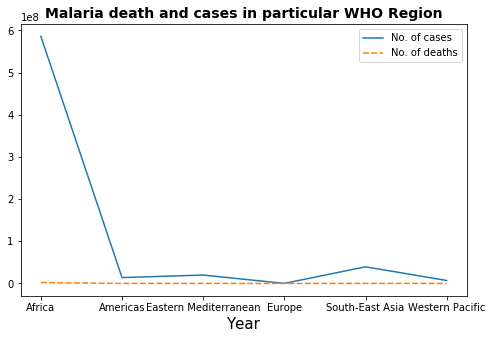

In [19]:
df5 = df.groupby('WHO Region').sum().loc[:, ['No. of cases', 'No. of deaths']]
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df5)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases in particular WHO Region', fontsize=14, fontweight='bold')
plt.show()

In [20]:
df_group =df.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()
df_group.head()

C:\Users\vaishnavi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,No. of cases,No. of deaths
0,Afghanistan,2295043.0,363.0
1,Algeria,2645.0,4.0
2,Angola,26006152.0,209838.0
3,Argentina,2098.0,2.0
4,Armenia,355.0,0.0


In [21]:
df_cases = df_group[["Country","No. of cases"]]
df_cases.head()

,Country,No. of cases
0,Afghanistan,2295043.0
1,Algeria,2645.0
2,Angola,26006152.0
3,Argentina,2098.0
4,Armenia,355.0


5) MALARIA CASES FROM 2000 - 2018

In [47]:
pio.templates.default ='gridon'
fig = px.bar(df_cases.sort_values("No. of cases",ascending=False)[:20][::-1],x="No. of cases",y ="Country",text="No. of cases",
             title="Malaria Cases from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=500,orientation="h")#
fig.show()

6) MALARIA DEATHS FROM 2000-2018

In [48]:
df_death = df_group[["Country","No. of deaths"]]
pio.templates.default ='gridon'
fig = px.bar(df_death.sort_values("No. of deaths",ascending=False)[:20][::-1],x="No. of deaths",y ="Country",text="No. of deaths",
             title="Top 20 Country with highest number of Malaria Deaths from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=500,orientation="h")
fig.show()

In [28]:
who_group =df.groupby('WHO Region')["No. of cases","No. of deaths"].sum().reset_index()
who_group.head().style.background_gradient(cmap ='Reds')

C:\Users\vaishnavi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,WHO Region,No. of cases,No. of deaths
0,Africa,586002159.000000,2053621.000000
1,Americas,13894342.000000,11225.000000
2,Eastern Mediterranean,19932663.000000,26764.000000
3,Europe,112675.000000,25.000000
4,South-East Asia,39468640.000000,49803.000000


7) DEATH RATE WITH RESPECT TO WHO REGION

In [55]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=who_group["WHO Region"],
                                 values=who_group['No. of deaths'])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',textfont_size=12,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(width=500,
    height=600)
fig.show()


LINEAR REGRESSION

In [29]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [30]:
x = train_df['No. of cases'].values
y = train_df['No. of deaths'].values
Actual = test_df['No. of deaths'].values

In [31]:
def mean(values):
    return np.mean(values)

In [32]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [33]:
mean_X, mean_Y = mean(x), mean(y)

In [34]:
var_x, var_y = variance(x, mean_X), variance(y, mean_Y)

In [35]:
print(mean_X, var_x)

371055.75870967744 2561191105112728.0


In [36]:
print(mean_Y, var_y)

1138.2793548387097 26051291958.039436


In [37]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x)*(y[i] - mean_y)
    return covar

In [38]:
covariance(x, mean_X, y, mean_Y)

3162007817817.4824

In [39]:

def coefficients(data):
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    return [b0, b1]

In [40]:
predictions = []
b0, b1 = coefficients(train_df)
for i,row in test_df.iterrows():
    ynew = b0 + b1 * row['No. of cases']
    predictions.append(ynew)

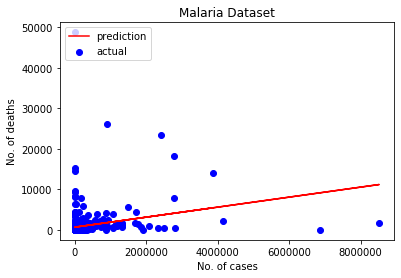

In [56]:
regression_line = [(b0 + b1*x) for x in test_df['No. of cases']]
plt.scatter(test_df['No. of cases'], test_df['No. of deaths'], c='b', label='actual')
plt.plot(test_df['No. of cases'], regression_line, c='r', label='prediction')
plt.legend(loc='upper left')
plt.title('Malaria Dataset')
plt.xlabel('No. of cases')
plt.ylabel('No. of deaths')
plt.show()